In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [86]:
%matplotlib inline

# Importing dataframe

In [112]:
path=r'C:\Users\solom\Desktop\Achievement-6 Solomon'

In [6]:
df= pd.read_csv(os.path.join(path, 'Manipulated Data', 'Adidas_sales_clean.csv'), index_col = False)

In [7]:
df.head()

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Year,Month,Day,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Profit,Margin ratio,Sales Method
0,0,Foot Locker,1185732,1/1/2020,2020,January,1,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000.0,0.50,In-store
1,1,Foot Locker,1185732,1/2/2020,2020,January,2,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000.0,0.30,In-store
2,2,Foot Locker,1185732,1/3/2020,2020,January,3,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000.0,0.35,In-store
3,3,Foot Locker,1185732,1/4/2020,2020,January,4,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875.0,0.35,In-store
4,4,Foot Locker,1185732,1/5/2020,2020,January,5,Northeast,New York,New York,Men's Apparel,60,900,540000,162000.0,0.30,In-store


## Removing unnecessary columns

In [9]:
df = df.drop(columns=['Unnamed: 0'])

In [10]:
df.head()

,Retailer,Retailer ID,Invoice Date,Year,Month,Day,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Profit,Margin ratio,Sales Method
0,Foot Locker,1185732,1/1/2020,2020,January,1,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000.0,0.50,In-store
1,Foot Locker,1185732,1/2/2020,2020,January,2,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000.0,0.30,In-store
2,Foot Locker,1185732,1/3/2020,2020,January,3,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000.0,0.35,In-store
3,Foot Locker,1185732,1/4/2020,2020,January,4,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875.0,0.35,In-store
4,Foot Locker,1185732,1/5/2020,2020,January,5,Northeast,New York,New York,Men's Apparel,60,900,540000,162000.0,0.30,In-store


## Renaming columns

In [11]:
df.rename(columns = {'Total Sales' : 'Revenue'}, inplace = True)

In [12]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Year', 'Month', 'Day',
       'Region', 'State', 'City', 'Product', 'Price per Unit', 'Units Sold',
       'Revenue', 'Profit', 'Margin ratio', 'Sales Method'],
      dtype='object')

In [65]:
df.dtypes

Retailer           object
Retailer ID         int64
Invoice Date       object
Year                int64
Month              object
Day                 int64
Region             object
State              object
City               object
Product            object
Price per Unit      int64
Units Sold          int64
Revenue             int64
Profit            float64
Margin ratio      float64
Sales Method       object
dtype: object

In [111]:
df.describe()

,Retailer ID,Year,Day,Price per Unit,Units Sold,Revenue,Profit,Margin ratio
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,2020.865050,14.696310,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,2.636038e+04,0.341688,7.348019,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,1.128299e+06,2020.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,2021.000000,9.000000,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,2021.000000,15.000000,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,2021.000000,21.000000,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,2021.000000,31.000000,110.000000,1275.000000,825000.000000,390000.000000,0.800000


## Scatterplot

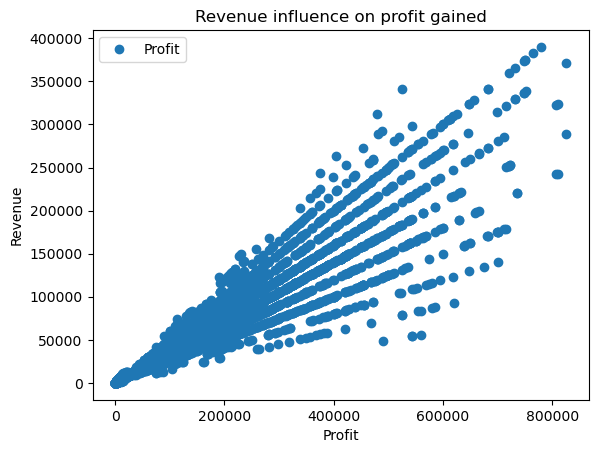

In [101]:
# Create a scatterplot comparing checkout time and trip time
df.plot(x = 'Revenue', y= 'Profit' ,style='o') 
plt.title('Revenue influence on profit gained')  
plt.xlabel('Profit')  
plt.ylabel('Revenue')  
plt.show()

# Creating variables for regression

In [102]:
#reshape variables for regression into numpy arrays
y = df['Profit'].values.reshape(-1, 1)
X = df['Revenue'].values.reshape(-1, 1)

In [103]:
# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [104]:
#create a regression object
regression = LinearRegression()

In [105]:
#Fit the regression to the train set
regression.fit(X_train, y_train)

LinearRegression()

In [106]:
y_predicted = regression.predict(X_test)

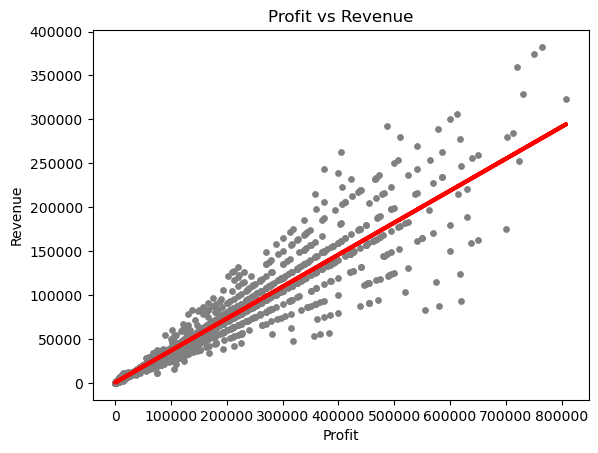

In [107]:
# Create a plot that shows the regression line for the test set model

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Profit vs Revenue')
plot_test.xlabel('Profit')
plot_test.ylabel('Revenue')
plot_test.show()

## My Hypothesis: Higher the revenue gained by the business higher the profit for Adidas

In [108]:
# Create objects for model mean squared error and R2 score

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [109]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.36417047]]
Mean squared error:  227371246.9259155
R2 score:  0.9200961476900649


## The R square value is close to 1 which shows the 2 variables have a strong correlation but the mean squared error is high since the values arent centered around the mean value

In [110]:
# Create a dataframe comparing the real and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2698.24,1940.067998
1,4057.56,3252.538388
2,1248.00,1775.462944
3,227.24,514.340592
4,2553.98,2334.100452
5,3049.80,3203.011203
6,1072.26,1204.079470
7,3506.49,5084.680043
8,1512.00,1731.762487
9,52062.50,54525.556132


## The predicted value does not allign with the actual value which makes the model a poor fit

## Exporting dataframe